# <font color="purple">**Churn prediction and Item recommendation on online retail dataset**</font>

## **Problem Statement**:

Given a transactional dataset, tasks to perform : <font color="blue">Exploratory Data Analysis (EDA), Data pre-processing, Customer Segmentation, User profiling, Item recommendation for each users and churn prediction</font>

# <font color="blue">**Exploratory Data Analysis (EDA)**</font>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv file into dataframe
dataset = pd.read_csv('data.csv', encoding='unicode_escape')
dataset.head(10) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
# Exploring number of observations and attributes
dataset.shape

(152258, 8)

In [4]:
# Exploring names of the attributes
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# Exploring the types of the attributes
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# Exploring the statistics of the numerical attributes
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,152257.000000,152257.000000,105382.000000
mean,8.988368,5.154434,15289.224441
std,274.313066,102.117819,1733.504703
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.460000,15189.000000
75%,10.000000,4.210000,16873.000000
max,74215.000000,16888.020000,18283.000000


# <font color="blue">**Data Pre-Processing**</font>

## **Imputation**

In [7]:
# calculating number of missing values in each of the attributes
dataset.isnull().sum()

InvoiceNo          0
StockCode          0
Description      624
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     46876
Country            1
dtype: int64

In [8]:
# threshold to drop the observations if the proportion of null values is more than the threshold.
threshold = 0.4

In [9]:
# proportion of null values in description attribute
dataset['Description'].isnull().sum() / dataset.shape[0]

0.00409830682131645

The proportion of null values in `Description` attribute is less than the `threshold`, hence safe to drop the observations with null values.

In [10]:
# Dropping the observations with null values for Description attribute
dataset.dropna(subset=['Description'], inplace=True)

In [11]:
# Validation of the dropped observations with null values for Description attribute
dataset['Description'].isnull().sum()

0

In [12]:
# proportion of null values in CustomerID attribute
dataset['CustomerID'].isnull().sum() / dataset.shape[0]

0.3050239392220742

The proportion of null values in `CustomerID` attribute is less than the `threshold`, hence safe to drop the observations with null values.


In [13]:
# Dropping the observations with null values for customerID attribute
dataset.dropna(subset=['CustomerID'], inplace=True)

In [14]:
# Validation of the dropped observations with null values for CustomerID attribute
dataset['CustomerID'].isnull().sum()

0

In [15]:
# New shape of the dataset after dropping the observation with null values
dataset.shape

(105382, 8)

In [16]:
# No attribute with null values
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Binning**

In [17]:
# Obtaining the classes of Country categorical attribute 
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada'],
      dtype=object)

In [18]:
# Obtaining the counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom          93698
Germany                  2486
France                   2158
EIRE                     1635
Spain                     764
Netherlands               696
Belgium                   491
Portugal                  434
Australia                 382
Switzerland               371
Cyprus                    304
Italy                     268
Finland                   264
Channel Islands           241
Norway                    212
Japan                     211
Singapore                 118
Sweden                    110
Poland                     98
Greece                     85
Iceland                    84
Denmark                    59
Austria                    48
Lebanon                    45
Lithuania                  35
United Arab Emirates       30
Israel                     18
Czech Republic             17
Canada                     10
Saudi Arabia               10
Name: Country, dtype: int64

Replacing the `Country` name class with `others` whose frequency is less than 100

In [19]:
dataset['Country'] = dataset['Country'].replace(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'], 'Others')

In [20]:
# Obtaining the new counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom     93698
Germany             2486
France              2158
EIRE                1635
Spain                764
Netherlands          696
Belgium              491
Portugal             434
Australia            382
Switzerland          371
Cyprus               304
Italy                268
Finland              264
Channel Islands      241
Norway               212
Japan                211
Others               137
Singapore            118
Sweden               110
Poland                98
Greece                85
Iceland               84
Denmark               59
Austria               48
Israel                18
Canada                10
Name: Country, dtype: int64

## **Removing and handling Outliers**

Removing the outlier rows by using InterQuartile range

In [21]:
# Statistical description of Quantity attribute
dataset['Quantity'].describe()

count    105382.000000
mean         11.974455
std         327.829074
min      -74215.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       74215.000000
Name: Quantity, dtype: float64

In [22]:
# Obtaining q1, q3, iqr, upper and lower limits for Quantity attribute
a = []
a = np.sort(dataset['Quantity'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 27.0
lower limit : -3.0


In [23]:
# Removing the outliers by filtering
dataset = dataset[(dataset['Quantity'] < upper_lim) & (dataset['Quantity'] > lower_lim)]

In [24]:
# Statistical description of UnitPrice attribute
dataset['UnitPrice'].describe()

count    97706.000000
mean         3.618401
std         23.321839
min          0.000000
25%          1.250000
50%          2.080000
75%          3.750000
max       2382.920000
Name: UnitPrice, dtype: float64

In [25]:
# Obtaining q1, q3, iqr, upper and lower limits for UnitPrice attribute
a = []
a = np.sort(dataset['UnitPrice'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 7.5
lower limit : 0.0


In [26]:
# Removing the outliers by filtering
dataset = dataset[(dataset['UnitPrice'] < upper_lim) & (dataset['UnitPrice'] > lower_lim)]

In [27]:
# Obtaining the negative and 0 values of Quantity attribute
a = []
for i in dataset['Quantity']:
  if i <= 0:
    a.append(i)

print(a)

[-1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -2.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -2.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -2.0, -2.0, -1.0, -2.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -2.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -2.0, -2.

In [28]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['Quantity'] > 0]

In [29]:
# Obtaining the negative and 0 values of UnitPrice attribute
b = []
for i in dataset['UnitPrice']:
  if i <= 0:
    b.append(i)
print(b)

[]


In [30]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['UnitPrice'] > 0]

In [31]:
# New shape of the dataset
dataset.shape

(86159, 8)

## **Log Transformation**

In [32]:
# Applying log transformation on Quantity and UnitPrice attributes
dataset['Log_Transformed_Quantity'] = dataset['Quantity'].transform(np.log1p)
dataset['Log_Transformed_UnitPrice'] = dataset['UnitPrice'].transform(np.log1p)

In [33]:
# Exploring the dataset after transformations
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402


## **Scaling**

### 1. Normalization

In [34]:
dataset['Normalized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].min()) / (dataset['Quantity'].max() - dataset['Quantity'].min())

dataset['Normalized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].min()) / (dataset['UnitPrice'].max() - dataset['UnitPrice'].min()) 

### 2. Standardization

In [35]:
dataset['Standardized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].mean()) / dataset['Quantity'].std()

dataset['Standardized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].mean()) / dataset['UnitPrice'].std()

In [36]:
# Exploring the dataset after scaling
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.203033,0.196183
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.094191,0.326909
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.565807,-0.203033,1.307353
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.203033,-0.261358
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.203033,-0.261358
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.203033,-0.097950
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.203033,-0.097950


## **Date & Time extraction**

In [37]:
# Creating the attributes for date, month, year, weekday and time of InvoiceDate
dataset['Date'] = pd.to_datetime(dataset['InvoiceDate']).dt.day

dataset['Month'] = pd.to_datetime(dataset['InvoiceDate']).dt.month

dataset['Year'] = pd.to_datetime(dataset['InvoiceDate']).dt.year

dataset['Weekday'] = pd.to_datetime(dataset['InvoiceDate']).dt.day_name()

dataset['Time'] = pd.to_datetime(dataset['InvoiceDate']).dt.time

In [38]:
# Exploring the created date, day, time attributes
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.203033,0.196183,1,12,2010,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.094191,0.326909,1,12,2010,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.565807,-0.203033,1.307353,1,12,2010,Wednesday,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.203033,-0.261358,1,12,2010,Wednesday,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.203033,-0.261358,1,12,2010,Wednesday,08:28:00
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.203033,-0.097950,1,12,2010,Wednesday,08:34:00
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.203033,-0.097950,1,12,2010,Wednesday,08:34:00


## **Visual Representation**

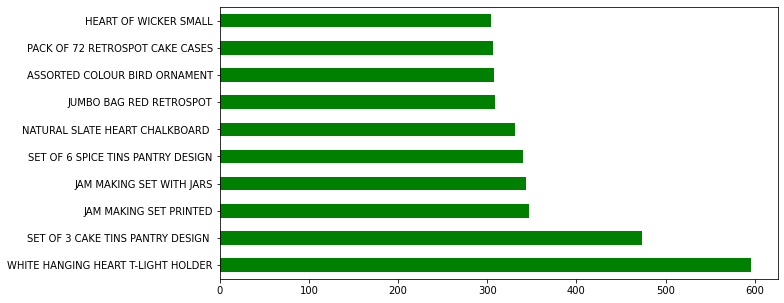

In [39]:
# Exploring the description of the 10 products with the highest count
dataset['Description'].value_counts()[:10].plot(kind='barh', color='green', figsize=(10, 5))

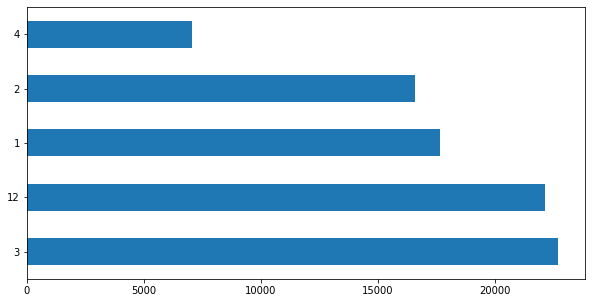

In [40]:
# Exploring the sales in different months
dataset['Month'].value_counts().plot(kind='barh', figsize=(10,5))

From the graph, we can interpret that November recorded most sales and February recorded least sales.

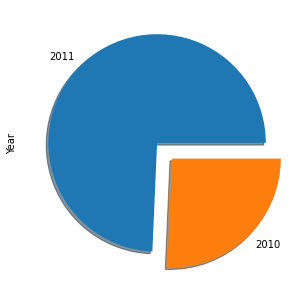

In [41]:
# Exploring the number of sales by year
dataset['Year'].value_counts().plot(kind='pie', explode=(0,0.2), shadow=True, figsize=(10,5))

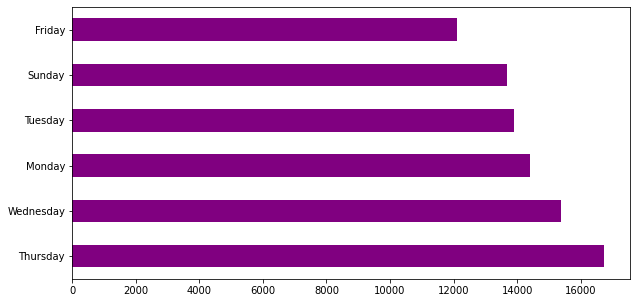

In [42]:
# Exploring the number of sales by days
dataset['Weekday'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

From the above graph, we can interpret that the store used to be closed on saturdays and the maximum sales used to happen on thursday as opposed to the least sales on Friday.

# <font color="blue">**Customer Segmentation**</font>

In [43]:
# Exploring the dataset grouped by InvoiceNo and Description
dataset.groupby(['InvoiceNo', 'Description']).size()[:50]

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         1
           GLASS STAR FROSTED T-LIGHT HOLDER      1
           KNITTED UNION FLAG HOT WATER BOTTLE    1
           RED WOOLLY HOTTIE WHITE HEART.         1
           WHITE HANGING HEART T-LIGHT HOLDER     1
           WHITE METAL LANTERN                    1
536366     HAND WARMER RED POLKA DOT              1
           HAND WARMER UNION JACK                 1
536367     BOX OF 6 ASSORTED COLOUR TEASPOONS     1
           BOX OF VINTAGE JIGSAW BLOCKS           1
           FELTCRAFT PRINCESS CHARLOTTE DOLL      1
           HOME BUILDING BLOCK WORD               1
           IVORY KNITTED MUG COSY                 1
           LOVE BUILDING BLOCK WORD               1
           POPPY'S PLAYHOUSE BEDROOM              1
           POPPY'S PLAYHOUSE KITCHEN              1
536368     BLUE COAT RACK PARIS FASHION           1
           JAM MAKING SET WITH JARS               1
           RED CO

In [44]:
# Exploring the dataset grouped by CustomerID and Description
dataset.groupby(['CustomerID', 'Description']).size()

CustomerID  Description                       
12347.0     3D DOG PICTURE PLAYING CARDS          2
            3D SHEET OF CAT STICKERS              1
            3D SHEET OF DOG STICKERS              1
            60 TEATIME FAIRY CAKE CASES           1
            72 SWEETHEART FAIRY CAKE CASES        1
                                                 ..
18283.0     TOILET METAL SIGN                     1
            TRAVEL SEWING KIT                     1
            VINTAGE BILLBOARD LOVE/HATE MUG       2
            WHITE HANGING HEART T-LIGHT HOLDER    1
            WOODLAND CHARLOTTE BAG                2
Length: 71434, dtype: int64

## **1. Products Ordered**

In [45]:
def encode_column(column):
  if column > 0:
    return 1
  if column <= 0:
    return 0

# Function to get the count of the products ordered
def aggregate_by_ordered_quantity(dataframe, column_list):

  aggregated_dataframe = dataframe.groupby(column_list).Quantity.count().reset_index()

  aggregated_dataframe['Products_ordered'] = aggregated_dataframe.Quantity.apply(encode_column)

  final_dataframe = aggregated_dataframe.groupby(column_list[0]).Products_ordered.sum().reset_index()

  return final_dataframe

In [46]:
# Creating customers dataframe
customers = aggregate_by_ordered_quantity(dataset, ['CustomerID', 'Description'])

customers.head()

,CustomerID,Products_ordered
0,12347.0,59
1,12348.0,6
2,12350.0,16
3,12352.0,21
4,12356.0,33


## **2. Total Spending**

Creating a `Sales` attribute which is product of `Quantity` and `UnitPrice`.

In [47]:
dataset['Sales'] = dataset['Quantity'] * dataset['UnitPrice']

# Exploring the dataset to validate the Sales attribute
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.203033,0.196183,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.094191,0.326909,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34


In [48]:
# Obtaining customers total spending
customer_total_spending = dataset.groupby('CustomerID').Sales.sum().reset_index()

customer_total_spending.rename(columns = {'Sales' : 'Total_spending'}, inplace = True)

In [49]:
# Merging the two dataframes on CustomerID
customers = pd.merge(customers, customer_total_spending, on='CustomerID')

print(f'The number of customers from the existing customer base : {customers.shape[0]}')

customers.head()

The number of customers from the existing customer base : 2141


,CustomerID,Products_ordered,Total_spending
0,12347.0,59,1413.03
1,12348.0,6,90.20
2,12350.0,16,294.40
3,12352.0,21,539.41
4,12356.0,33,1086.56


## **Scaling using Log1p transform**

In [50]:
# Function to apply log1p transformation
def apply_log1p_transformation(dataframe, column):

  dataframe['log_' + column] = np.log1p(dataframe[column])
  return dataframe['log_' + column]

### 1. Products ordered

In [51]:
apply_log1p_transformation(customers, 'Products_ordered')

0       4.094345
1       1.945910
2       2.833213
3       3.091042
4       3.526361
          ...   
2136    1.609438
2137    3.401197
2138    0.693147
2139    2.197225
2140    4.644391
Name: log_Products_ordered, Length: 2141, dtype: float64

### 2. Total spending

In [52]:
apply_log1p_transformation(customers, 'Total_spending')

0       7.254199
1       4.513055
2       5.688330
3       6.292328
4       6.991692
          ...   
2136    4.313480
2137    6.338488
2138    3.951244
2139    4.927254
2140    5.705281
Name: log_Total_spending, Length: 2141, dtype: float64

In [53]:
# Exploring the dataset to validate the log transformed attributes
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending
0,12347.0,59,1413.03,4.094345,7.254199
1,12348.0,6,90.20,1.945910,4.513055
2,12350.0,16,294.40,2.833213,5.688330
3,12352.0,21,539.41,3.091042,6.292328
4,12356.0,33,1086.56,3.526361,6.991692


## **Feature Selection**

In [54]:
customers.iloc[:,3:]

,log_Products_ordered,log_Total_spending
0,4.094345,7.254199
1,1.945910,4.513055
2,2.833213,5.688330
3,3.091042,6.292328
4,3.526361,6.991692
...,...,...
2136,1.609438,4.313480
2137,3.401197,6.338488
2138,0.693147,3.951244
2139,2.197225,4.927254


# <font color="blue">**K-Means Clustering**</font>

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

kmeans_model.fit(customers.iloc[:,3:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Intracluster distance

In [57]:
print(f'Intracluster distance of the model is: ', kmeans_model.inertia_)

Intracluster distance of the model is:  509.94413713726794


This distance needs to be minimized by finding optimal hyper paramter.

## **Hyperparameter tuning**

In [58]:
def make_list_of_K(K, dataframe):

  cluster_values = list(range(1, K+1))
  inertia_values = []

  for c in cluster_values:
    model = KMeans(n_clusters=c, init='k-means++', max_iter=500, random_state=42)
    model.fit(dataframe)
    inertia_values.append(model.inertia_)
  
  return inertia_values

In [59]:
# Checking for k values between 1 to 15
results = make_list_of_K(15, customers.iloc[:, 3:])

In [60]:
k_values_distances = pd.DataFrame({'clusters': list(range(1, 16)), 'Intracluster distances': results})

print(k_values_distances)

    clusters  Intracluster distances
0          1             4610.842116
1          2             2056.715743
2          3             1272.270219
3          4              962.432615
4          5              787.395966
5          6              665.844032
6          7              577.366634
7          8              509.944137
8          9              454.636509
9         10              411.842228
10        11              381.253732
11        12              348.055642
12        13              323.654509
13        14              300.309122
14        15              283.024893


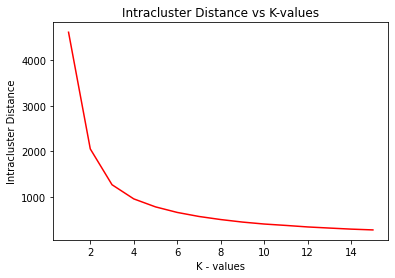

In [61]:
plt.plot(k_values_distances['clusters'], k_values_distances['Intracluster distances'], color='red')
plt.xlabel('K - values')
plt.ylabel('Intracluster Distance')
plt.title('Intracluster Distance vs K-values')
plt.show()

From the graph, its clear that after k = 4, the descent gets stabilized so the optimal k is 4.  

In [62]:
# Updating model with optimal k
updated_kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42)

updated_kmeans_model.fit_predict(customers.iloc[:, 3:])

array([0, 2, 3, ..., 1, 2, 3], dtype=int32)

## Adding cluster centers

In [63]:
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_

actual_data = np.expm1(cluster_centers)

add_points = np.append(actual_data, cluster_centers, axis=1)

add_points

array([[  71.88430588, 1169.77407835,    4.28887333,    7.06542041],
       [   2.74546522,   45.3410997 ,    1.32054583,    3.83602925],
       [  10.58242858,  164.12363468,    2.44948917,    5.10669449],
       [  27.65257117,  377.73799523,    3.35524318,    5.93684466]])

In [64]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers['clusters'] = updated_kmeans_model.labels_

In [65]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=['Products_ordered', 'Total_spending', 'log_Products_ordered', 'log_Total_spending', 'clusters'])

centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,71.884306,1169.774078,4.288873,7.065420,0.0
1,2.745465,45.341100,1.320546,3.836029,1.0
2,10.582429,164.123635,2.449489,5.106694,2.0
3,27.652571,377.737995,3.355243,5.936845,3.0


In [66]:
# Changing the type of clusters attribute to int
centers_df['clusters'] = centers_df['clusters'].astype('int')
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,71.884306,1169.774078,4.288873,7.065420,0
1,2.745465,45.341100,1.320546,3.836029,1
2,10.582429,164.123635,2.449489,5.106694,2
3,27.652571,377.737995,3.355243,5.936845,3


In [67]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,12347.0,59,1413.03,4.094345,7.254199,0
1,12348.0,6,90.20,1.945910,4.513055,2
2,12350.0,16,294.40,2.833213,5.688330,3
3,12352.0,21,539.41,3.091042,6.292328,3
4,12356.0,33,1086.56,3.526361,6.991692,0
5,12359.0,64,1022.31,4.174387,6.930798,0
6,12361.0,9,174.90,2.302585,5.169916,2
7,12362.0,26,434.10,3.295837,6.075576,3
8,12365.0,20,307.94,3.044522,5.733147,3
9,12370.0,114,2031.75,4.744932,7.617145,0


## **Cluster Visualization**

In [68]:
# Creating the attribute Cluster_name
customers['Cluster_name'] = customers['clusters'].astype(str)

customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,59,1413.03,4.094345,7.254199,0,0
1,12348.0,6,90.20,1.945910,4.513055,2,2
2,12350.0,16,294.40,2.833213,5.688330,3,3
3,12352.0,21,539.41,3.091042,6.292328,3,3
4,12356.0,33,1086.56,3.526361,6.991692,0,0
5,12359.0,64,1022.31,4.174387,6.930798,0,0
6,12361.0,9,174.90,2.302585,5.169916,2,2
7,12362.0,26,434.10,3.295837,6.075576,3,3
8,12365.0,20,307.94,3.044522,5.733147,3,3
9,12370.0,114,2031.75,4.744932,7.617145,0,0


In [69]:
# Obtaining the value counts of all the clusters.
magnitude_df = pd.DataFrame(customers.Cluster_name.value_counts().reset_index())

magnitude_df.rename(columns={'index':'Customer Groups', 'Cluster_name': 'Customer Group Magnitude'}, inplace=True)

magnitude_df

,Customer Groups,Customer Group Magnitude
0,3,786
1,2,662
2,0,464
3,1,229


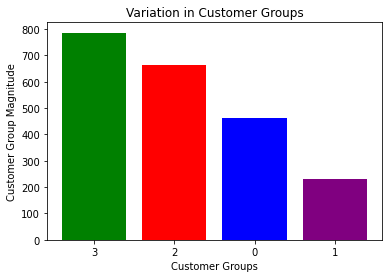

In [70]:
# Plotting the bar graph to interpret the number of customers in each clusters
plt.bar(magnitude_df['Customer Groups'], magnitude_df['Customer Group Magnitude'], color=['green', 'red', 'blue', 'purple'])
plt.xlabel('Customer Groups')
plt.ylabel('Customer Group Magnitude')
plt.title('Variation in Customer Groups')
plt.show()

# <font color="blue">**Customer Profiling**</font>

## Number of products brought by each customerID

In [71]:
customers.iloc[:,:2]

,CustomerID,Products_ordered
0,12347.0,59
1,12348.0,6
2,12350.0,16
3,12352.0,21
4,12356.0,33
...,...,...
2136,18270.0,4
2137,18272.0,29
2138,18273.0,1
2139,18280.0,8


## Total bill of each customerID

In [72]:
customers[['CustomerID', 'Total_spending']]

,CustomerID,Total_spending
0,12347.0,1413.03
1,12348.0,90.20
2,12350.0,294.40
3,12352.0,539.41
4,12356.0,1086.56
...,...,...
2136,18270.0,73.70
2137,18272.0,564.94
2138,18273.0,51.00
2139,18280.0,137.00


## **Customers Grouping based on customer segmentation**

### **Group 0**

In [73]:
customers[customers['clusters'] == 0]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,59,1413.03,4.094345,7.254199,0,0
4,12356.0,33,1086.56,3.526361,6.991692,0,0
5,12359.0,64,1022.31,4.174387,6.930798,0,0
9,12370.0,114,2031.75,4.744932,7.617145,0,0
12,12377.0,69,1472.52,4.248495,7.295409,0,0
...,...,...,...,...,...,...,...
2123,18225.0,53,903.76,3.988984,6.807670,0,0
2124,18226.0,44,872.00,3.806662,6.771936,0,0
2128,18239.0,54,1011.00,4.007333,6.919684,0,0
2129,18245.0,50,693.68,3.931826,6.543451,0,0


### **Group1**

In [74]:
customers[customers['clusters'] == 1]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
19,12401.0,2,32.85,1.098612,3.521939,1,1
25,12414.0,4,75.00,1.609438,4.330733,1,1
37,12435.0,2,78.00,1.098612,4.369448,1,1
46,12464.0,1,30.60,0.693147,3.453157,1,1
108,12619.0,1,10.08,0.693147,2.405142,1,1
...,...,...,...,...,...,...,...
2065,18062.0,1,15.00,0.693147,2.772589,1,1
2090,18138.0,4,67.80,1.609438,4.231204,1,1
2112,18191.0,2,37.40,1.098612,3.648057,1,1
2136,18270.0,4,73.70,1.609438,4.313480,1,1


### **Group2**

In [75]:
customers[customers['clusters'] == 2]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
1,12348.0,6,90.20,1.945910,4.513055,2,2
6,12361.0,9,174.90,2.302585,5.169916,2,2
11,12373.0,12,299.10,2.564949,5.704116,2,2
14,12386.0,7,215.70,2.079442,5.378514,2,2
20,12402.0,10,195.60,2.397895,5.281171,2,2
...,...,...,...,...,...,...,...
2122,18224.0,10,158.95,2.397895,5.074861,2,2
2132,18259.0,7,376.30,2.079442,5.933041,2,2
2134,18263.0,14,277.00,2.708050,5.627621,2,2
2135,18269.0,7,168.60,2.079442,5.133443,2,2


### **Group3**

In [76]:
customers[customers['clusters'] == 3]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
2,12350.0,16,294.40,2.833213,5.688330,3,3
3,12352.0,21,539.41,3.091042,6.292328,3,3
7,12362.0,26,434.10,3.295837,6.075576,3,3
8,12365.0,20,307.94,3.044522,5.733147,3,3
10,12372.0,18,315.52,2.944439,5.757386,3,3
...,...,...,...,...,...,...,...
2127,18231.0,19,399.75,2.995732,5.993338,3,3
2130,18250.0,17,270.62,2.890372,5.604404,3,3
2131,18257.0,14,324.00,2.708050,5.783825,3,3
2137,18272.0,29,564.94,3.401197,6.338488,3,3


## Frequency of customers visiting the store

In [77]:
frequency_of_customer = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

frequency_of_customer

CustomerID
12347.0    3
12348.0    3
12350.0    1
12352.0    4
12356.0    2
          ..
18270.0    1
18272.0    1
18273.0    1
18280.0    1
18283.0    3
Name: InvoiceNo, Length: 2141, dtype: int64

In [78]:
customers = pd.merge(customers, frequency_of_customer, on='CustomerID')

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,InvoiceNo
0,12347.0,59,1413.03,4.094345,7.254199,0,0,3
1,12348.0,6,90.20,1.945910,4.513055,2,2,3
2,12350.0,16,294.40,2.833213,5.688330,3,3,1
3,12352.0,21,539.41,3.091042,6.292328,3,3,4
4,12356.0,33,1086.56,3.526361,6.991692,0,0,2


In [79]:
customers.rename(columns = {'InvoiceNo': 'Frequency_of_customer'}, inplace=True)

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,Frequency_of_customer
0,12347.0,59,1413.03,4.094345,7.254199,0,0,3
1,12348.0,6,90.20,1.945910,4.513055,2,2,3
2,12350.0,16,294.40,2.833213,5.688330,3,3,1
3,12352.0,21,539.41,3.091042,6.292328,3,3,4
4,12356.0,33,1086.56,3.526361,6.991692,0,0,2


## Customer visit number per year and per month

In [80]:
new_dataset = dataset[['InvoiceNo', 'CustomerID', 'Year', 'Month']]

new_dataset.head()

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
1,536365,17850.0,2010,12
2,536365,17850.0,2010,12
3,536365,17850.0,2010,12
4,536365,17850.0,2010,12


In [81]:
# Dropping the duplicates
new_dataset.drop_duplicates(inplace=True)

new_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
7,536366,17850.0,2010,12
10,536367,13047.0,2010,12
21,536368,13047.0,2010,12
25,536369,13047.0,2010,12


In [82]:
# Dropping the index
new_dataset = new_dataset.reset_index(drop=True)

In [83]:
# Obtaining number of visits per year
new_dataset['Visit_no_yr'] = new_dataset.groupby(['CustomerID', 'Year']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr
0,536365,17850.0,2010,12,1
1,536366,17850.0,2010,12,2
2,536367,13047.0,2010,12,1
3,536368,13047.0,2010,12,2
4,536369,13047.0,2010,12,3
...,...,...,...,...,...
4606,549577,14286.0,2011,4,1
4607,549578,17340.0,2011,4,1
4608,549579,15780.0,2011,4,1
4609,549581,16188.0,2011,4,1


In [84]:
# Number of visits per month
new_dataset['Visit_no_month'] = new_dataset.groupby(['CustomerID', 'Month']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr,Visit_no_month
0,536365,17850.0,2010,12,1,1
1,536366,17850.0,2010,12,2,2
2,536367,13047.0,2010,12,1,1
3,536368,13047.0,2010,12,2,2
4,536369,13047.0,2010,12,3,3
...,...,...,...,...,...,...
4606,549577,14286.0,2011,4,1,1
4607,549578,17340.0,2011,4,1,1
4608,549579,15780.0,2011,4,1,1
4609,549581,16188.0,2011,4,1,1


# <font color='blue'>**Item Recommendation system using Word2Vec**</font>

In [85]:
no_of_customers =  list(dataset['CustomerID'].unique())

print(f'Number of unique customers are {len(no_of_customers)}')

Number of unique customers are 2141


In [86]:
# Typecasting
dataset['StockCode'] = dataset['StockCode'].astype(str)

### Shuffling the customers and using 90% of it for creating the model & then splitting into train and validation dataset

In [87]:
import random

random.shuffle(no_of_customers)

customers_train = [no_of_customers[i] for i in range(round(0.9 * len(no_of_customers)))]

train_dataset = dataset[dataset['CustomerID'].isin(customers_train)]
validation_dataset = dataset[~dataset['CustomerID'].isin(customers_train)]

## List of purchases made by the customer 

In [88]:
from tqdm import tqdm

### 1. Training dataset

In [89]:
purchases_train = []

for i in tqdm(customers_train):
  temp = list(train_dataset[train_dataset['CustomerID'] == i]['StockCode'])
  purchases_train.append(temp)

100%|██████████| 1927/1927 [00:01<00:00, 999.37it/s] 


### 2. Validation dataset

In [90]:
purchases_val = []

for i in tqdm(validation_dataset['CustomerID'].unique()):
  temp = list(validation_dataset[validation_dataset['CustomerID'] == i]['StockCode'])
  purchases_val.append(temp)

100%|██████████| 214/214 [00:00<00:00, 1313.36it/s]


In [91]:
from gensim.models import Word2Vec

### Creating the Word2Vec model

In [92]:
model = Word2Vec(window = 10, sg = 1, hs = 0, negative = 10, alpha = 0.03, min_alpha = 0.0007, seed = 14)

model.build_vocab(purchases_train, progress_per = 200)

model.train(purchases_train, total_examples = model.corpus_count, epochs = 10, report_delay = 1)

(752780, 780300)

In [93]:
model.init_sims(replace=True)

print(model)

Word2Vec(vocab=1965, size=100, alpha=0.03)


### Each vector of 2879 unique vocabulary words has the size of 100

In [94]:
X = model[model.wv.vocab]

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(1965, 100)

### Visual representation of similar products

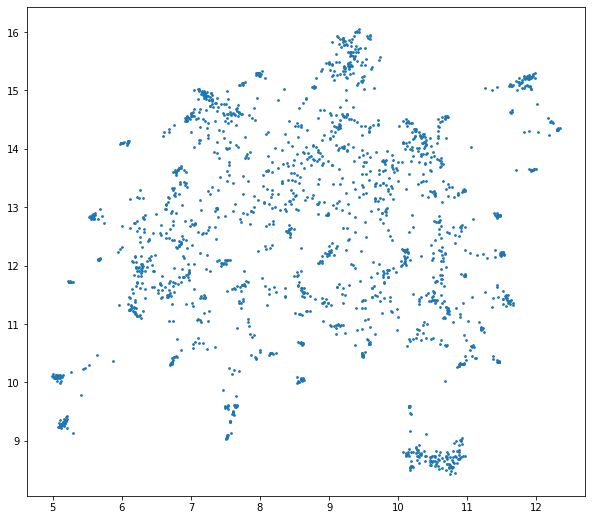

In [95]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Creating a product dictionary

In [96]:
products = train_dataset[['StockCode', 'Description']]

products.drop_duplicates(inplace=True, subset='StockCode', keep='last')

products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
products_dict['22748']

["POPPY'S PLAYHOUSE KITCHEN"]

In [98]:
products_dict['84029G']

['KNITTED UNION FLAG HOT WATER BOTTLE']

## Recommendation Function based on single product vector and will return 6 similar products

In [99]:
def similar_products(v, n = 6):
  ms = model.similar_by_vector(v, topn = n + 1)[1:]
  new_ms = []
  for j in ms:
    pair = (products_dict[j[0]][0], j[1])
    new_ms.append(pair)
  
  return new_ms

In [100]:
similar_products(model['84029G'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RED WOOLLY HOTTIE WHITE HEART.', 0.825326681137085),
 ('ENGLISH ROSE HOT WATER BOTTLE', 0.7448293566703796),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.7411115169525146),
 ('SCOTTIE DOG HOT WATER BOTTLE', 0.6958119869232178),
 ('PAIR PADDED HANGERS PINK CHECK', 0.686948299407959),
 ('CHARLIE+LOLA RED HOT WATER BOTTLE ', 0.6831134557723999)]

## Recommendation function based on average of products vector bought by user and will return 6 similar products

In [101]:
def aggregate_vectors(products):
  product_vec = []
  for i in products:
    try:
      product_vec.append(model[i])
    except KeyError:
      continue
  
  return np.mean(product_vec, axis=0)

In [102]:
len(purchases_val[0])

58

In [103]:
aggregate_vectors(purchases_val[0]).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(100,)

In [104]:
similar_products(aggregate_vectors(purchases_val[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('MINI JIGSAW GO TO THE FAIR', 0.791551947593689),
 ('DOLLY HONEYCOMB GARLAND', 0.7659803628921509),
 ('FAIRY TALE COTTAGE NIGHTLIGHT', 0.7587142586708069),
 ('MOUSEY LONG LEGS SOFT TOY', 0.7581184506416321),
 ('PLASTERS IN TIN CIRCUS PARADE ', 0.7554559707641602),
 ('RED POLKADOT PUDDING BOWL', 0.755284309387207)]

In [105]:
similar_products(aggregate_vectors(purchases_val[0][-5:]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('PLASTERS IN TIN WOODLAND ANIMALS', 0.7823139429092407),
 ('PACK 3 FIRE ENGINE/CAR PATCHES', 0.7648223042488098),
 ('MIRRORED WALL ART STARS', 0.7615953683853149),
 ('PLASTERS IN TIN STRONGMAN', 0.7522805333137512),
 ('PLASTERS IN TIN SPACEBOY', 0.7433873414993286),
 ('MOUSEY LONG LEGS SOFT TOY', 0.7406435012817383)]

# <font color="blue">**Churn Prediction**</font>

In [106]:
dataset[['Date', 'Month', 'Year']]

,Date,Month,Year
0,1,12,2010
1,1,12,2010
2,1,12,2010
3,1,12,2010
4,1,12,2010
...,...,...,...
152252,11,4,2011
152253,11,4,2011
152254,11,4,2011
152255,11,4,2011


In [107]:
dataset['Month'].unique()

array([12,  1,  2,  3,  4])

## Splitting the dataset

### Initial dataset consists of data till end of july 2011 

In [108]:
initial_dataset = dataset[((dataset['Month']==12) & (dataset['Year']==2010)) | 
                          ((dataset['Month']==1) & (dataset['Year']==2011)) |
                          ((dataset['Month']==2) & (dataset['Year']==2011)) |
                          ((dataset['Month']==3) & (dataset['Year']==2011)) |
                          ((dataset['Month']==4) & (dataset['Year']==2011)) |
                          ((dataset['Month']==5) & (dataset['Year']==2011)) |
                          ((dataset['Month']==6) & (dataset['Year']==2011)) |
                          ((dataset['Month']==7) & (dataset['Year']==2011))]

initial_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.203033,0.196183,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.094191,0.326909,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.203033,0.745232,1,12,2010,Wednesday,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152252,549583,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,4/11/2011 9:46,2.95,15214.0,United Kingdom,1.945910,1.373716,0.20,0.389417,-0.203033,0.457635,11,4,2011,Monday,09:46:00,17.70
152253,549583,84946,ANTIQUE SILVER T-LIGHT GLASS,12.0,4/11/2011 9:46,1.25,15214.0,United Kingdom,2.564949,0.810930,0.44,0.158752,0.688639,-0.653535,11,4,2011,Monday,09:46:00,15.00
152254,549583,22241,GARLAND WOODEN HAPPY EASTER,12.0,4/11/2011 9:46,1.25,15214.0,United Kingdom,2.564949,0.810930,0.44,0.158752,0.688639,-0.653535,11,4,2011,Monday,09:46:00,15.00
152255,549583,22857,ASSORTED EASTER GIFT TAGS,12.0,4/11/2011 9:46,0.85,15214.0,United Kingdom,2.564949,0.615186,0.44,0.104478,0.688639,-0.914987,11,4,2011,Monday,09:46:00,10.20


### Final dataset consists data from start of August 2011 till end

In [109]:
final_dataset = dataset[((dataset['Month']==8) & (dataset['Year']==2011)) |
                        ((dataset['Month']==9) & (dataset['Year']==2011)) | 
                        ((dataset['Month']==10) & (dataset['Year']==2011)) |
                        ((dataset['Month']==11) & (dataset['Year']==2011)) |
                        ((dataset['Month']==12) & (dataset['Year']==2011))]

final_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales


## Finding the frequency of each customers during start of December 2010 to end of July 2011 

In [110]:
initial_frequency = initial_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

initial_frequency

CustomerID
12347.0    3
12348.0    3
12350.0    1
12352.0    4
12356.0    2
          ..
18270.0    1
18272.0    1
18273.0    1
18280.0    1
18283.0    3
Name: InvoiceNo, Length: 2141, dtype: int64

In [111]:
initial_frequency_table = pd.DataFrame({'CustomerID': initial_dataset['CustomerID'].unique()})

initial_frequency_table = initial_frequency_table.sort_values('CustomerID').reset_index()

del initial_frequency_table['index']

initial_frequency_table

,CustomerID
0,12347.0
1,12348.0
2,12350.0
3,12352.0
4,12356.0
...,...
2136,18270.0
2137,18272.0
2138,18273.0
2139,18280.0


In [112]:
initial_frequency_table = pd.merge(initial_frequency_table, initial_frequency, on='CustomerID')

initial_frequency_table.head(10)

,CustomerID,InvoiceNo
0,12347.0,3
1,12348.0,3
2,12350.0,1
3,12352.0,4
4,12356.0,2
5,12359.0,2
6,12361.0,1
7,12362.0,1
8,12365.0,1
9,12370.0,3


In [113]:
initial_frequency_table.rename(columns={'InvoiceNo': 'Initial_frequency'}, inplace=True)

initial_frequency_table

,CustomerID,Initial_frequency
0,12347.0,3
1,12348.0,3
2,12350.0,1
3,12352.0,4
4,12356.0,2
...,...,...
2136,18270.0,1
2137,18272.0,1
2138,18273.0,1
2139,18280.0,1


In [114]:
initial_frequency_table['Initial_frequency'].describe()

count    2141.000000
mean        2.153667
std         2.867840
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        56.000000
Name: Initial_frequency, dtype: float64

## Finding the frequency of each customers during start of August 2011 to end of dataset

In [115]:
final_frequency = final_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

final_frequency

Series([], Name: InvoiceNo, dtype: int64)

In [116]:
final_frequency_table = pd.DataFrame({'CustomerID': final_dataset['CustomerID'].unique()})

final_frequency_table = final_frequency_table.sort_values('CustomerID').reset_index()

del final_frequency_table['index']

final_frequency_table

,CustomerID


In [117]:
final_frequency_table = pd.merge(final_frequency_table, final_frequency, on='CustomerID')

final_frequency_table.rename(columns={'InvoiceNo': 'Final_frequency'}, inplace=True)

final_frequency_table

,CustomerID,Final_frequency


In [118]:
final_frequency_table['Final_frequency'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Final_frequency, dtype: float64

## Checking for customers who used to shop before but have stopped shopping from last 4 months

In [119]:
a = np.array(initial_frequency_table['CustomerID'])
b = np.array(final_frequency_table['CustomerID'])

### Churned customers

In [120]:
c = np.setdiff1d(a, b)
print(len(c), c)

2141 [12347. 12348. 12350. ... 18273. 18280. 18283.]


### Unchurned customers

In [121]:
d = np.intersect1d(a, b)
print(len(d), d)

0 []


In [122]:
e = np.setdiff1d(b, a)
print(len(e), e)

0 []


In [123]:
list1 = []
for i in range(len(c)):
  list1.append('CHURN')

In [124]:
list2 = []
for i in range(len(d)):
  list2.append('NOT CHURN')

In [125]:
list3 = []
for i in range(len(e)):
  list3.append('NOT CHURN')

In [126]:
dict1 = dict(zip(c, list1))
dict2 = dict(zip(d, list2))
churn_dict = dict(zip(e, list3))

dict2.update(dict1)
churn_dict.update(dict2)

In [127]:
from collections import OrderedDict

churn_dictionary = OrderedDict(sorted(churn_dict.items()))

churn_dictionary

OrderedDict([(12347.0, 'CHURN'),
             (12348.0, 'CHURN'),
             (12350.0, 'CHURN'),
             (12352.0, 'CHURN'),
             (12356.0, 'CHURN'),
             (12359.0, 'CHURN'),
             (12361.0, 'CHURN'),
             (12362.0, 'CHURN'),
             (12365.0, 'CHURN'),
             (12370.0, 'CHURN'),
             (12372.0, 'CHURN'),
             (12373.0, 'CHURN'),
             (12377.0, 'CHURN'),
             (12383.0, 'CHURN'),
             (12386.0, 'CHURN'),
             (12388.0, 'CHURN'),
             (12393.0, 'CHURN'),
             (12395.0, 'CHURN'),
             (12399.0, 'CHURN'),
             (12401.0, 'CHURN'),
             (12402.0, 'CHURN'),
             (12407.0, 'CHURN'),
             (12408.0, 'CHURN'),
             (12410.0, 'CHURN'),
             (12413.0, 'CHURN'),
             (12414.0, 'CHURN'),
             (12415.0, 'CHURN'),
             (12417.0, 'CHURN'),
             (12421.0, 'CHURN'),
             (12422.0, 'CHURN'),
          

## **Churn Prediction for each customer**

In [128]:
churn = pd.DataFrame(list(churn_dictionary.items()), columns=['CustomerID', 'Prediction'])

In [129]:
churn.head(10)

,CustomerID,Prediction
0,12347.0,CHURN
1,12348.0,CHURN
2,12350.0,CHURN
3,12352.0,CHURN
4,12356.0,CHURN
5,12359.0,CHURN
6,12361.0,CHURN
7,12362.0,CHURN
8,12365.0,CHURN
9,12370.0,CHURN


In [130]:
churn.tail(10)

,CustomerID,Prediction
2131,18257.0,CHURN
2132,18259.0,CHURN
2133,18260.0,CHURN
2134,18263.0,CHURN
2135,18269.0,CHURN
2136,18270.0,CHURN
2137,18272.0,CHURN
2138,18273.0,CHURN
2139,18280.0,CHURN
2140,18283.0,CHURN


# RFM Analysis

---

RFM stands for Recency, Frequency and Monetary Value each corresponding to some key customer trait. 

Recency is the number of days since last purchase.

Frequency is the total number of purchases made by a customer.

Monetary value is the total money spent by a customer.

Frequency and Monetary Value Effects a customer's lifetime value and Recency affects retention, a measure of engagement.

**Recency**

To calculate Recency score, we use a recent date point as a reference to compute number of days since the customer's last purchase.

In [131]:
# last date available in our dataset
dataset['InvoiceDate'].max()

'4/8/2011 9:58'

In [132]:
import datetime as dt
now = dt.date(2011, 12, 9)

In [133]:
rec_df = dataset.copy()

In [134]:
rec_df['date'] = pd.DatetimeIndex(rec_df['InvoiceDate']).date

In [135]:
# group by customers and check last date of purchase
rec_df = rec_df.groupby(by='CustomerID', as_index=False)['date'].max()
rec_df.columns = ['CustomerID','LastPurchaseDate']
rec_df.head()

,CustomerID,LastPurchaseDate
0,12347.0,2011-04-07
1,12348.0,2011-04-05
2,12350.0,2011-02-02
3,12352.0,2011-03-22
4,12356.0,2011-04-08


In [136]:
# calculate recency
rec_df['Recency'] = rec_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [137]:
rec_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12347.0,2011-04-07,246
1,12348.0,2011-04-05,248
2,12350.0,2011-02-02,310
3,12352.0,2011-03-22,262
4,12356.0,2011-04-08,245


Less the recency value, more recent the purchase is.

In [138]:
rec_df.sort_values(by=['Recency'])
rec_df = rec_df[['CustomerID','Recency']]
rec_df.head()

,CustomerID,Recency
0,12347.0,246
1,12348.0,248
2,12350.0,310
3,12352.0,262
4,12356.0,245


**Frequency**

In [139]:
freq_df = customers[["CustomerID","Frequency_of_customer"]]
freq_df.head()

,CustomerID,Frequency_of_customer
0,12347.0,3
1,12348.0,3
2,12350.0,1
3,12352.0,4
4,12356.0,2


**Monetary**

In [140]:
monetary = customers[["CustomerID","Total_spending"]]
monetary.head()

,CustomerID,Total_spending
0,12347.0,1413.03
1,12348.0,90.20
2,12350.0,294.40
3,12352.0,539.41
4,12356.0,1086.56


**Creating RFM Table**

In [141]:
rfm = rec_df.merge(freq_df, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency_of_customer
0,12347.0,246,3
1,12348.0,248,3
2,12350.0,310,1
3,12352.0,262,4
4,12356.0,245,2


In [142]:
rfm = rfm.merge(monetary, on='CustomerID')
rfm.set_index('CustomerID', inplace=True)
rfm.head()

,Recency,Frequency_of_customer,Total_spending
CustomerID,,,
12347.0,246,3,1413.03
12348.0,248,3,90.20
12350.0,310,1,294.40
12352.0,262,4,539.41
12356.0,245,2,1086.56


**RFM Anaylsis**

To conduct RFM analysis, here we rank these customers from 1-4 using RFM values. We sort customers based on RFM value. A final RFM score is calculated simply by combining individual RFM score number.

In [143]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency_of_customer,Total_spending
0.25,259.0,1.0,154.02
0.50,282.0,1.0,299.70
0.75,317.0,2.0,605.90


In [144]:
quantiles.to_dict()

{'Frequency_of_customer': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Recency': {0.25: 259.0, 0.5: 282.0, 0.75: 317.0},
 'Total_spending': {0.25: 154.01999999999998,
  0.5: 299.69999999999993,
  0.75: 605.9000000000002}}

**Creating RFM Segments**

Here, high value of recency has low score while high value of frequency and monetary value has high score.

In [145]:
def RScore(x, p, d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

def FMScore(x, p, d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

In [146]:
rfm_seg = rfm.copy()
rfm_seg['R_Quartile'] = rfm_seg['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm_seg['F_Quartile'] = rfm_seg['Frequency_of_customer'].apply(FMScore, args=('Frequency_of_customer', quantiles,))
rfm_seg['M_Quartile'] = rfm_seg['Total_spending'].apply(FMScore, args=('Total_spending', quantiles,))
rfm_seg.head()

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12347.0,246,3,1413.03,4,4,4
12348.0,248,3,90.20,4,4,1
12350.0,310,1,294.40,2,1,2
12352.0,262,4,539.41,3,4,3
12356.0,245,2,1086.56,4,3,4


Now, we combine these scores to give RFM value.

In [147]:
rfm_seg['RFMScore'] = rfm_seg.R_Quartile.map(str) + rfm_seg.F_Quartile.map(str) + rfm_seg.M_Quartile.map(str)
rfm_seg.head()

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12347.0,246,3,1413.03,4,4,4,444
12348.0,248,3,90.20,4,4,1,441
12350.0,310,1,294.40,2,1,2,212
12352.0,262,4,539.41,3,4,3,343
12356.0,245,2,1086.56,4,3,4,434


As we know best score for recency, frequency and monetary value is 4. Hence the best RFM score is 444.

In [148]:
rfm_seg[rfm_seg['RFMScore']=='444'].sort_values('Total_spending', ascending=False).head(10)

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
14911.0,246,41,15568.35,4,4,4,444
13089.0,246,26,12180.27,4,4,4,444
15311.0,243,35,8408.74,4,4,4,444
15039.0,249,17,6196.19,4,4,4,444
14298.0,255,16,5757.80,4,4,4,444
17841.0,248,32,5258.28,4,4,4,444
14156.0,249,11,5025.19,4,4,4,444
12748.0,245,56,4222.45,4,4,4,444
15061.0,253,20,3704.55,4,4,4,444


In [149]:
print("Best Customers: ",len(rfm_seg[rfm_seg['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_seg[rfm_seg['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='111']))

Best Customers:  178
Loyal Customers:  491
Big Spenders:  535
Almost Lost:  41
Lost Customers:  10
Lost Cheap Customers:  189


Now we have segmented our customers into categories. We need to choose strategies to deal with each category. For instance,

Best Customers: We reward them by allowing earlier access to new products. Suggest them to "Refer a friend".

At Risk: Send personalized emails and discounts to encourage them to shop.